# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Perfume usage Gender-wise](#3.5.1_gender_wise)
    * [3.5.2 Popular Notes in Perfumes](#3.5.2_Perfume_Notes)
      * [3.5.2.1 Pick out commonly used notes in perfumes](#3.5.2.1_Top_Notes)
      * [3.5.2.2 Visualize top 25 Notes by gender](#3.5.2.2_Top_25_gender)
  * [3.6 Feature Engineering](#3.6_Feature_Engineering)
      * [3.6.1 Create New Features](#3.6.1_Create_Features)
      * [3.6.2 Pick the features for ML Model](#3.6.2_Pick_Features)
      * [3.6.3 Feature correlation heatmap](#3.6.3_Feature_correlation_heatmap)
  * [3.7 Summary](#3.7_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

We have data scraped from [fragrantica](https://www.fragrantica.com/) website which will help us determine the gender to market a new perfume to.

The most important factor of a perfume are the _notes_ that make it up. We will feed a set of notes to our model and will be informed if the perfume will suit

- female
- male
- unisex

The data has been cleaned up.  We would like to do some initial exploration to understand how perfumes are recived across the gender spectrum.

## 3.3 Imports<a id='3.3_Imports'></a>

In [41]:
import pandas as pd
import numpy as np
import missingno as msno
import re 
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import zscore


## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [42]:
perfume_data = pd.read_csv('../data/interim/perfume_labeled.csv')
df = perfume_data.copy()

In [43]:
df.shape

(47648, 24)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47648 entries, 0 to 47647
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     47648 non-null  object
 1   notes_1   45423 non-null  object
 2   notes_2   43904 non-null  object
 3   notes_3   41121 non-null  object
 4   notes_4   38242 non-null  object
 5   notes_5   34902 non-null  object
 6   notes_6   31168 non-null  object
 7   notes_7   27265 non-null  object
 8   notes_8   22753 non-null  object
 9   notes_9   16563 non-null  object
 10  notes_10  12322 non-null  object
 11  notes_11  9188 non-null   object
 12  notes_12  6678 non-null   object
 13  notes_13  5000 non-null   object
 14  notes_14  3756 non-null   object
 15  notes_15  2899 non-null   object
 16  notes_16  2242 non-null   object
 17  notes_17  1712 non-null   object
 18  notes_18  1312 non-null   object
 19  notes_19  992 non-null    object
 20  notes_20  763 non-null    object
 21  label     47

In [45]:
df.head()

,title,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,...,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,label,notes,gender
0,Aamal The Spirit of Dubai for women and men,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,...,Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,men,"Bulgarian Rose,Bergamot,Fruits,Agarwood Oud,Sa...",unisex
1,Aatifa Ajmal for women and men,Top1Rose,Top2Cumin,Middle0Amber,NaN,Base0Musk,Base1Amber,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women,"Rose,Cumin,Amber,Musk,Amber",unisex
2,AA Al-Jazeera Perfumes for women and men,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Rose,Sandalwood,Apple,Agarwood Oud",unisex
3,aarewasser Art of Scent - Swiss Perfumes for w...,Top1Green Tea,Top2White Flowers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Green Tea,White Flowers",unisex
4,Aaliyah Hamidi Oud & Perfumes for women and men,Top1Amber,Top2Sandalwood,NaN,Top4Vetiver,Top5Saffron,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unisex,"Amber,Sandalwood,Vetiver,Saffron",unisex


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Perfume usage Gender-wise<a id='3.5.1_gender_wise'></a>

What is the percentage of perfumes in the market under each gender?

We have two gender related information with us.
- The gender marketed by the manufacturers
- The gender voted by customers

How much does it differ?

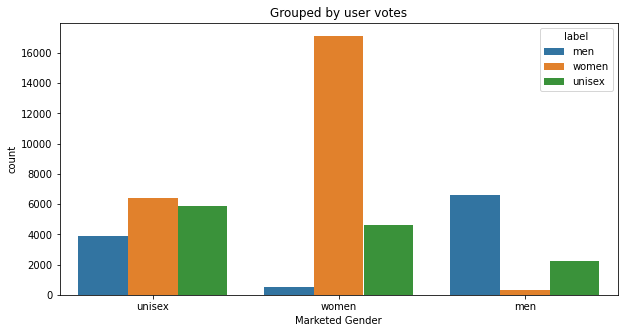

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.gender, hue=df['label'])
plt.title('Grouped by user votes')  
plt.xlabel('Marketed Gender')
plt.show();

There are more perfumes available in the *women* segment than all other segments. Even perfumes that are marketed as *unisex* are generally voted as more suited to *women* than *men*. Perfumes marked as _women_ have a good percentage marked as _unisex_. Even within _men's_ perfumes, a small percentage have been voted on as sutiable for unisex.

In [47]:
# Check out the percentage values
print("Number of perfumes marketed for women:", len(df[df.gender == 'women']))
print("Breakup of perfumes marketed for women:")
print(df[df.gender == 'women']['label'].value_counts())
print("\n")

print("Number of perfumes marketed for men:", len(df[df.gender == 'men']))
print("Breakup of perfumes marketed for men:")
print(df[df.gender == 'men']['label'].value_counts())
print("\n")

print("Number of perfumes marketed for unisex:", len(df[df.gender == 'unisex']))
print("Breakup of perfumes marketed for unisex:")
print(df[df.gender == 'unisex']['label'].value_counts())
print("\n")

Number of perfumes marketed for women: 22274
Breakup of perfumes marketed for women:
women     17133
unisex     4600
men         541
Name: label, dtype: int64


Number of perfumes marketed for men: 9149
Breakup of perfumes marketed for men:
men       6621
unisex    2228
women      300
Name: label, dtype: int64


Number of perfumes marketed for unisex: 16225
Breakup of perfumes marketed for unisex:
women     6411
unisex    5897
men       3917
Name: label, dtype: int64




### 3.5.2 Popular Notes in Perfumes<a id='3.5.2_Perfume_Notes'></a>

#### 3.5.2.1 Pick out commonly used notes in perfumes<a id='3.5.2.1_Top_Notes'></a>

A perfume is made up of distinct notes/smells. Let's see collect all the distinct *notes* in our dataset.

In [48]:
#look for all disitnct notes in our dataset
notes_set = {note for row in df['notes'].astype(str) for note in row.split(',')}
len(notes_set)

1440

We have **1440** unique notes in our dataset. Let's get a count of each of these notes.

In [49]:
df['notes_list'] = df.notes.str.split(',')

In [50]:
def get_count(label_count):
    
    labels = label_count.index.tolist()
    count = {}
    
    if 'women' in labels:
        count['women'] = label_count['women']
    else:
        count['women'] = 0
        
    if 'men' in labels:
        count['men'] = label_count['men']
    else:
        count['men'] = 0
    
    if 'unisex' in labels:
        count['unisex'] = label_count['unisex']
    else:
        count['unisex'] = 0
        
    return count

In [51]:
women_count= []
men_count= []
unisex_count= []

for note in notes_set:
    label_count = get_count(df.loc[df.notes_list.map(lambda x: True if note in x else False), 'label'].value_counts())
    women_count.append(label_count['women'])
    men_count.append(label_count['men'])
    unisex_count.append(label_count['unisex'])

note_count = pd.DataFrame({'note': list(notes_set), 'women': women_count, 'men': men_count, 'unisex': unisex_count})
note_count ['total'] = note_count[['women', 'men', 'unisex']].sum(axis=1)
note_count = note_count.sort_values(by='total', ascending=False).reset_index(drop=True)

note_count.shape(25)

#     plt.figure(figsize=(10,5))
#     sns.countplot(x=subset_df.gender, hue=subset_df['label'])
#     plt.title('Perfumes with '+ note + ' grouped by gender')  
#     plt.xlabel('Marketed Gender')
#     plt.show();

,note,women,men,unisex,total
611,Reed,6,3,9,18
393,Coconut Nectar,35,10,7,52
545,Black and Pink Pepper,5,12,9,26
1246,Sylkolide,1,1,0,2
344,Pine needles,18,28,21,67
562,Ash,8,8,7,23
676,Parsley,3,5,6,14
1148,China Rose,0,1,1,2
594,Acai berry,14,1,5,20
67,Rosemary,204,561,343,1108


We cannot process these many notes. Let's only consider the notes that appear in 100 or more perfumes.

In [52]:
final_notes = note_count[note_count.total >= 100]

In [64]:
final_notes.shape[0]

299

So we have **299** distinct notes that appear in 100 perfumes or more.

In [65]:
final_notes.tail(3)

,note,women,men,unisex,total
296,Clover,58,16,27,101
297,Rice,76,8,16,100
298,Red Rose,67,13,20,100


In [68]:
final_notes.head(10)

,note,women,men,unisex,total
0,Musk,9910,4084,4830,18824
1,Sandalwood,7050,3313,3421,13784
2,Jasmine,8009,2028,3415,13452
3,Amber,6180,3651,3484,13315
4,Patchouli,4862,3625,3241,11728
5,Rose,6625,1548,2732,10905
6,Vanilla,5837,1861,2954,10652
7,Cedar,3392,3099,2711,9202
8,Bergamot,3263,2146,1678,7087
9,Vetiver,2104,2474,1710,6288


**Musk** is the clear favourite, appearing in 18000+ perfumes. The top 10 notes appear in 6000 perfumes or more.

#### 3.5.2.2 Visualize top 25 Notes by gender<a id='3.5.2.2_Top_25_gender'></a>

Let's visualize top 25.

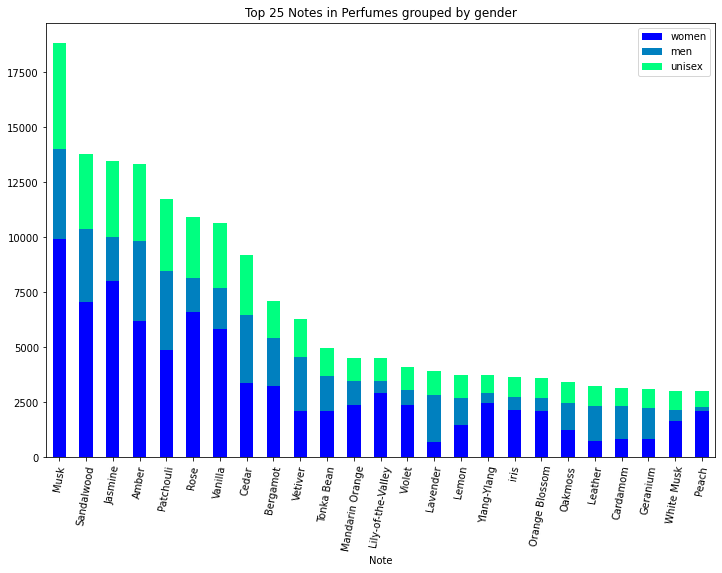

In [54]:
final_notes.iloc[0:25, 0:4].set_index('note').plot(kind='bar', stacked=True, figsize=(12,8), colormap='winter')
plt.title('Top 25 Notes in Perfumes grouped by gender')  
plt.xticks(rotation=80)
plt.xlabel('Note')
plt.show();

There are some notes, like 'Musk' which is present more in Women's prefumes, while we also have some notes like 'Cardamom' that appear more in men's perfumes.

So there is a clear preference for specific notes by a gender.

## 3.6 Feature Engineering<a id='3.6_Feature_Engineering'></a>

### 3.6.1 Create New Features<a id='3.6.1_Create_Features'></a>

We have made the business decision to consider all perfume Notes that appear in 100 or more perfumes. 

We are creating a column for each of these selected notes. The value for a note column will be set as 1, if the note is present in the perfume, else it will be set as 0.

To accomodate the notes we have discarded, we will have a separate column which will have the number of perfume notes that are not represented in the columns.

So for Eg: if a perfume had the notes - Lemon,Sage,Mint,Mahogany,Sandalwood,Amber

We have columns for the notes Lemon, Mint, Sandalwood and Amber. Those columns will be set as 1. As we also have 2 other notes (Sage, Mahogany) which do not have indepedent columns, we will recod the number '2' in a new column to denote there are 2 more perfume notes.

In [55]:
for note in final_notes.note:
    col_name = note.lower().replace(' ', '_')
    df[col_name] = df.notes_list.map(lambda x: 1 if note in x else 0)

df['other_notes'] = df.iloc[:,24:].apply(lambda row: (len(set(row[0])) - row[1:].sum()), axis=1)

Let's verify if the notes have been correctly processed by picking up random perfumes.

In [56]:
# First Perfume
df.iloc[0, 24]

['Bulgarian Rose',
 'Bergamot',
 'Fruits',
 'Agarwood Oud',
 'Sandalwood',
 'Agarwood Oud',
 'Cypriol Oil or Nagarmotha',
 'Benzoin',
 'Amber',
 'Castoreum',
 'Civet',
 'Moss',
 'Agarwood Oud',
 'Indian Oud']

In [57]:
df.iloc[0, 25:].loc[lambda x: x==1].to_frame().T

,sandalwood,amber,bergamot,agarwood_oud,benzoin,moss,bulgarian_rose,civet,cypriol_oil_or_nagarmotha,castoreum,fruits,other_notes
0,1,1,1,1,1,1,1,1,1,1,1,1


In [58]:
# Second Perfume
df.iloc[15000, 24]

['Musk']

In [59]:
df.iloc[15000, 25:].loc[lambda x: x==1].to_frame().T

,musk
15000,1


In [70]:
# Third Perfume
df.iloc[45000, 24]

['Neroli',
 'Bergamot',
 'Jasmine',
 'Rose',
 'Ylang-Ylang',
 'Carnation',
 'Lilac',
 'Vetiver',
 'Orris',
 'Opoponax',
 'Sandalwood',
 'Incense',
 'Musk',
 'Ambrette Musk Mallow',
 'Vanilla',
 'Coumarin']

In [71]:
df.iloc[45000, 25:].loc[lambda x: x==1].to_frame().T

,musk,sandalwood,jasmine,rose,vanilla,bergamot,vetiver,ylang-ylang,incense,neroli,carnation,ambrette_musk_mallow,lilac,orris,opoponax,coumarin
45000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### 3.6.2 Pick the features for ML Model<a id='3.6.2_Pick_Features'></a>

Now that features have been created, let's construct the dataframe with the features that will passed onto our ML model.

In [82]:
feature_cols = list(df.columns[25:].values)
feature_cols.append('label')
print(feature_cols)

['musk', 'sandalwood', 'jasmine', 'amber', 'patchouli', 'rose', 'vanilla', 'cedar', 'bergamot', 'vetiver', 'tonka_bean', 'mandarin_orange', 'lily-of-the-valley', 'violet', 'lavender', 'lemon', 'ylang-ylang', 'iris', 'orange_blossom', 'oakmoss', 'leather', 'cardamom', 'geranium', 'white_musk', 'peach', 'freesia', 'grapefruit', 'agarwood_oud', 'cinnamon', 'benzoin', 'incense', 'pink_pepper', 'nutmeg', 'tuberose', 'neroli', 'orange', 'peony', 'labdanum', 'black_currant', 'ginger', 'pepper', 'virginia_cedar', 'heliotrope', 'magnolia', 'raspberry', 'mint', 'vanille', 'saffron', 'gardenia', 'coriander', 'lily', 'ambergris', 'pear', 'carnation', 'guaiac_wood', 'apple', 'orchid', 'tobacco', 'plum', 'cloves', 'violet_leaf', 'basil', 'sage', 'honey', 'citruses', 'black_pepper', 'lime', 'rosemary', 'orris_root', 'galbanum', 'moss', 'olibanum', 'pineapple', 'caramel', 'spices', 'osmanthus', 'petitgrain', 'tangerine', 'mimosa', 'lotus', 'cashmere_wood', 'coconut', 'cyclamen', 'clary_sage', 'myrrh',

In [89]:
final_df = df[feature_cols]
final_df

,musk,sandalwood,jasmine,amber,patchouli,rose,vanilla,cedar,bergamot,vetiver,...,pink_peony,tomato_leaf,white_lily,fennel,sea_salt,clover,rice,red_rose,other_notes,label
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,men
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,women
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unisex
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unisex
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,unisex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47643,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,men
47644,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unisex
47645,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unisex
47646,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unisex


We have to now translate the `label` field to numeric values.

- women = 0
- men = 1
- unisex = 2

In [91]:
gender_map = {'women': 0, 'men': 1, 'unisex': 2}

final_df['label'] = final_df.label.map(gender_map)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
final_df

,musk,sandalwood,jasmine,amber,patchouli,rose,vanilla,cedar,bergamot,vetiver,...,pink_peony,tomato_leaf,white_lily,fennel,sea_salt,clover,rice,red_rose,other_notes,label
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47643,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47644,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
47645,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
47646,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


We have a final feature dataset with **47648** perfumes, **300** features and **1** label.

### 3.6.3 Feature Correlation Heatmap<a id='3.6.3_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

Let's see if there is any correlation bewtween the target feature and independent features.

In [ ]:
corr_df = final_df.corr()

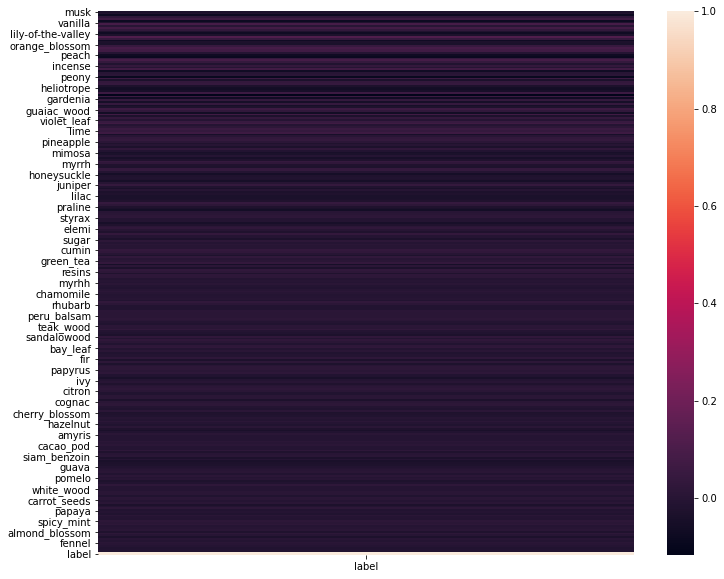

In [97]:
plt.subplots(figsize=(12,10))
sns.heatmap(corr_df[['label']]);

There is no discernable correlation. How about among the independent features?

In [100]:
corr_df.applymap(lambda x: x > 0.5).sum()

musk           1
sandalwood     1
jasmine        1
amber          1
patchouli      1
              ..
clover         1
rice           1
red_rose       1
other_notes    1
label          1
Length: 301, dtype: int64

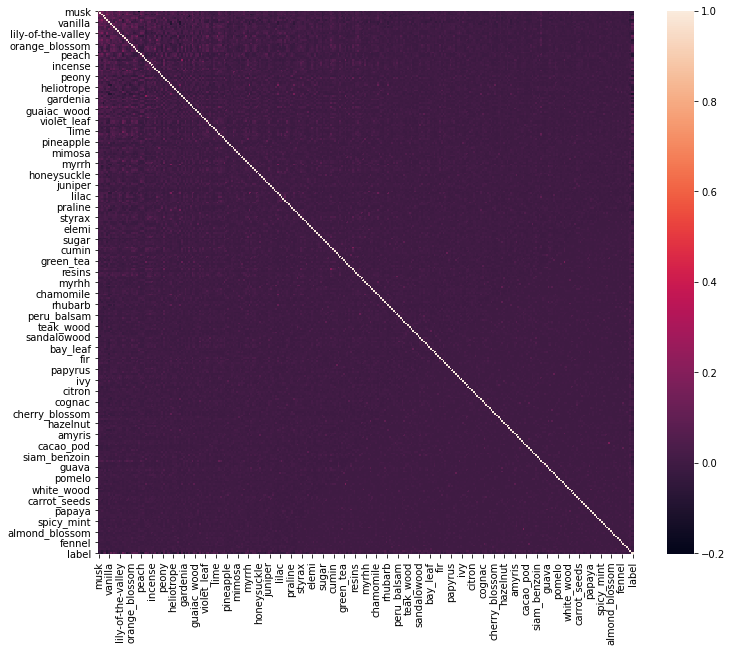

In [98]:
plt.subplots(figsize=(12,10))
sns.heatmap(final_df.corr());

Again there seems to be no correlation. No further action required.

## 3.7 Summary<a id='3.7_Summary'></a>

We started off with a dataset which had details about perfumes, mainly the notes of a perfume. We wish to predict the gender that will prefer a perfume given the perfume notes that make up the perfume.

For this we did the following.

1. Identified all distinct `Notes` in our dataset - 1440.
2. Found the count of each `Note` in our dataset. This helped us to identify the most commonly used `Notes` in perfumes.
3. Picked all `Notes` that appear in 100 or more perfumes - we have **300** such `Notes`.
4. For each of these `Notes`, we created a new column which will have values 1 or 0 depending on whether the `Note` is present in a particular perfume.
5. For those `Notes` that are not captured in these columns, we have a separate `other_notes` column which will have the count of other non-specified notes in that perfume.
6. This gave us a dataset with 300 independent features and one dependent target.

We can now save this dataset and proceed to pre-processing step.

In [105]:
datapath = '../data/processed/'
datapath_skidata = os.path.join(datapath, 'perfume_data_step3_features.csv')
if not os.path.exists(datapath_skidata):
    final_df.to_csv(datapath_skidata, index=False)

Let's also save the `Notes` for which we created columns as a separate csv file.

In [106]:
datapath_skidata = os.path.join(datapath, 'perfume_notes_columns.csv')
if not os.path.exists(datapath_skidata):
    final_notes[['note']].to_csv(datapath_skidata, index=False)